## 1. 1D Random walks: properties; comparison numerical/analytical results; convergence
Write a code that simulates numerically a 1D random
walk with a Monte Carlo approach and gives the final position x_N after N steps with fixed length l and probabilities pl and pr of
moving left and right. Without any loss of generality, you can consider
x0 = 0 as starting position, and l=1.
The code should calculate also averages over many different walkers (start-
ing from different seeds):  and the mean square displacement
< x_N >, <x_N^2>, <Dx_N^2>
For comparison, the corresponding exact analytical ("theoretical") results
are:                                   
< x_N > = N(pr-pl)l;       
<Dx_N^2> = 4 pr pl N l^2

In [1]:
from random import uniform

def walkerN(N,pl):      #returns only the final position
    l=1
    x=0
    for i in range(N):
        if uniform(0,1)>pl:
            x=x-l
        else:
            x=x+l
    return x

In [2]:
from random import uniform

def walker(N,pl):   #returns the entire walk 
    lst=[]                  
    l=1
    x=0
    for i in range(N):
        lst.append(x)
        if uniform(0,1)>pl:
            x=x-l
        else:
            x=x+l
    return lst

In [3]:
import numpy as np

def momenti(lst):
    N=len(lst)
    sm=0
    sd=0
    for x in lst:
        sm=sm + x
        sd=sd + x**2
    XM = sm/N
    XS2 = (sd - XM**2*N)/(N-1)
    return(XM,XS2)

(a) For the sake of defniteness, choose pl=pr= 0.5 and fix N. In order
to follow the evolution of a random walk with the number of steps,
calculate and plot the instantaneous position, i.e., x_i and x^2_i
vs. i,
with i from 0 to N. Plot together the results for runs corresponding
to different seeds. Do the results change? How do they compare with
the expected theoretical behavior < x_i > = 0 and <x_i^2>= i l^2?         
In particular, consider the final values, x_N and x2_N and compare them
with the theoretical ones.

In [4]:
N=100     #number of steps
pl=0.5    #probability to move left
pr=1-pl
W=40       #number of walkers for average
WP=4       #number of walkers for plot

#plot of 4 walks
lstplot=[]
for i in range(WP):
    lstplot.append(walker(N,pl))

#average of 40 walks
lst2=[]                     #list of list (Nx40)
for i in range(W):          #40 walkers
    lst2.append(walker(N,pl))

lst2=list(map(list, zip(*lst2)))   #transpose list of list

lstavg=[]                  #walk made of averages
lstvar=[]                  #walk made of variances
for lst in lst2:
    m,s2=momenti(lst)
    lstavg.append(m)
    lstvar.append(s2)

(b) Calculate now the averages over many walkers for the instantaneous
quantities < x_i >, <x_i^2>, <Dx_i^2> and the final ones, 
< x_N >, <x_N^2>, <Dx_N^2>
and compare also these results with the theoretical values.
What do you observe now?

<IPython.core.display.Javascript object>


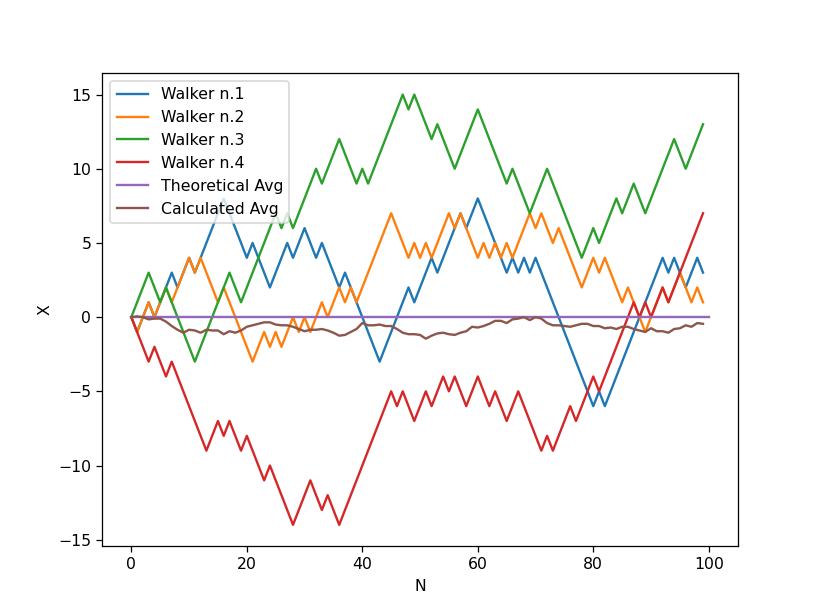

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
#x

#Plot of 4 walks

for i in range(WP):
    plt.plot(range(N), lstplot[i], label='Walker n.' + str(i + 1))
    
#Theoretical Average
x = np.linspace(0,N,100)
y = [0]*100
plt.plot(x,y, label='Theoretical Avg')
    
#Average of 40 walks
plt.plot(range(N), lstavg, label='Calculated Avg')
    
plt.xlabel('N')
plt.ylabel('X')
plt.legend()

Error on the position can be as high as 15 on the single walk but when averaged never exceeds 2.5

<IPython.core.display.Javascript object>


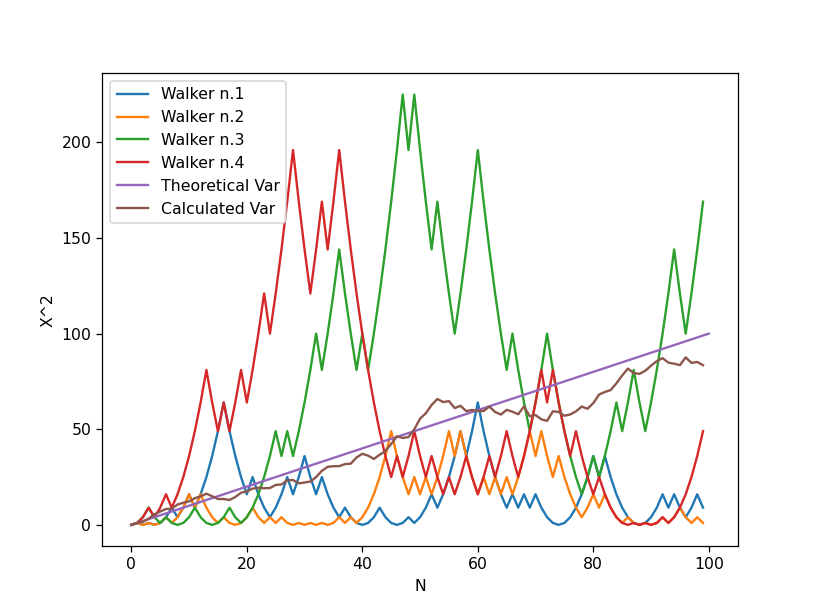

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#x^2

#Plot of 4 walks
for i in range(WP):
    plt.plot(range(N), [j ** 2 for j in lstplot[i]], label='Walker n.' + str(i + 1))
    
#Theoretical Average
x = np.linspace(0,N,100)
y = x
plt.plot(x,y, label='Theoretical Var')
    
#Average of 40 walks
plt.plot(range(N), lstvar, label='Calculated Var')
    
plt.xlabel('N')
plt.ylabel('X^2')
plt.legend()

Error on the variance can be as high as 200 but when averaged never exceeds 20

(c) Calculate the accuracy of the mean square displacement, given by
the relative deviation of the numerical value with respect to the theoretical value:                          
D=|Dx^2_N (theor) / Dx^2_N (calc)-1|

You should recognize that the larger is the number of walks for the
average, the smaller is D. How many walkers are needed to obtain a
"good" result, i.e. for istance with a relative accuracy of 5% with
respect to the expected behavior?

In [10]:
x0=0      #starting position
l=1       #step amplitude
N=100     #number of steps
pl=0.5    #probability to move left
pr=1-pl
ErrMAX=0.05

M=N*l*(pr-pl)
S2=4*pr*pl*N*l**2


lstErr=[]
Err=1

lst=[]
lst.append(walkerN(N,pl))
W=1       #walker counter
      
while(Err>ErrMAX):
    lst.append(walkerN(N,pl))
    xs2=momenti(lst)[1]
    Err=abs(xs2/S2-1)
    lstErr.append(Err)
    W=W+1
    
print('Walkers needed =', W)

Walkers needed = 25


<IPython.core.display.Javascript object>


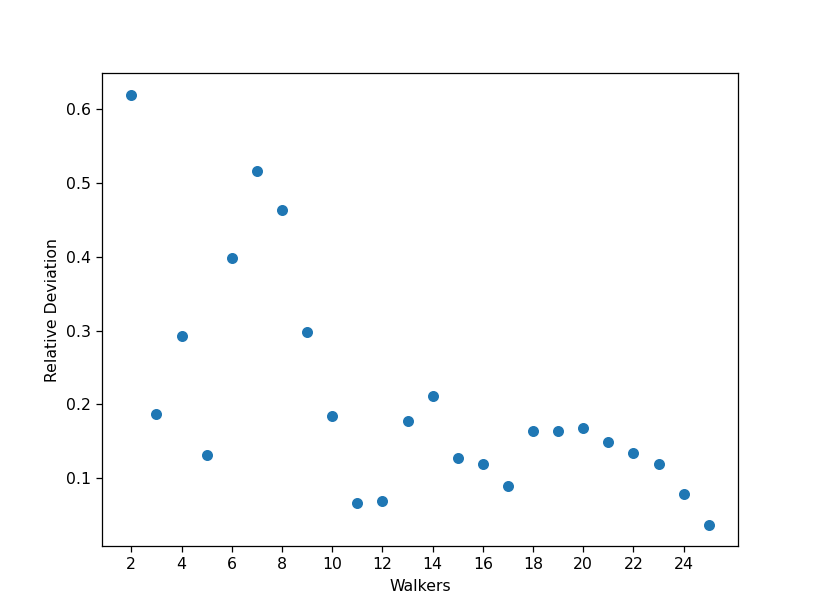

Text(0, 0.5, 'Relative Deviation')

In [11]:
import matplotlib.pyplot as plt
import numpy as np
#accuracy
plt.plot(range(2,2+len(lstErr)),lstErr, 'o')
plt.xticks(range(2,2+len(lstErr),2))
plt.xlabel('Walkers')
plt.ylabel('Relative Deviation')

The results may vary, but usually less than 50 walkers is enough

(e) Fix pl = pr and consider a number of walks (see point (c)) large
enough to have a "good" accuracy for the numerical estimate of
<Dx_N^2>.                                  
Determine the dependence of <Dx_N^2> on N.                           
Hint: in this problem, plotting <Dx_N^2> as a function of N should show
directly a linear behavior: <Dx_N^2> = aN . In general, making a
log-log plot is convenient to exploit the power low of the dependence
of <Dx_N^2> on N, that we expect to be: <Dx_N^2> = aN^(2v).
A linear fit in log-log form should give v=1/2. Using powers of 2 for
N, the data are equidistributed.

In [12]:
#least squares fit
import numpy as np

def lsfit(x,y):
    if len(x)== len(y):
        n=len(x)
    else:
        print('error: array lenghts do not match')
        
    x=np.array(x)
    y=np.array(y)
    
    xm=sum(x)/n
    ym=sum(y)/n
    
    ssxx=sum(x**2)-n*xm**2
    #ssyy=sum(y**2)-n*ym**2
    ssxy=sum(x*y)-n*xm*ym

    m=ssxy/ssxx
    q=ym-m*xm
    
    return(m,q)

In [13]:
import numpy as np

x0=0      #starting position
l=1       #step amplitude
N=100     #number of steps
pl=0.5    #probability to move left
pr=1-pl
W=50       #number of walkers

lst2=[]                     #list of list (Nx40)
for i in range(W):          #40 walkers
    lst2.append(walker(N,pl))

lst2=list(map(list, zip(*lst2)))   #transpose list of list

lstvar=[]                    #walk made of variances
for lst in lst2:
    m,s2=momenti(lst)
    lstvar.append(s2)

In [14]:
#least squares fit
x= [np.log(j ** 2) for j in range(1,N+1)]
y= [np.log(D) for D in lstvar]

m,q=lsfit(x,y)

print("Expected", 0.5, "Calculated", m)

Expected 0.5 Calculated nan


<ipython-input-14-f512606feaaf>:3: RuntimeWarning: divide by zero encountered in log
  y= [np.log(D) for D in lstvar]
<ipython-input-12-9254ad4758ac>:18: RuntimeWarning: invalid value encountered in multiply
  ssxy=sum(x*y)-n*xm*ym


(g) For sufficiently large N, P_N(x) can be approximated with the gaussian distribution:
P(x) = 1/sqrt(2 pi S^2) exp(-(x-M)^2/2S^2)
where M= <x>, S^2=<Dx_N^2>.
Verify by calculating numerically P_N(x) for N=8, 16, 32, 64 and
comparing it with P(x), where S^2 is numerically estimated. Discuss
the results.

In [43]:
import numpy as np

x0=0      #starting position
l=1       #step amplitude
N=64       #number of steps
pl=0.5    #probability to move left
pr=1-pl
W=1000    #points for the histogram

lst=[]

for i in range(W):
    lst.append(walkerN(N,pl))

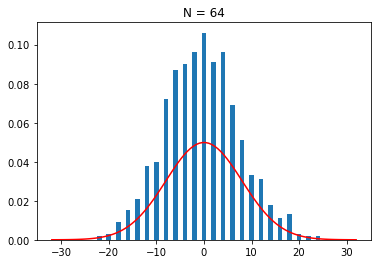

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

M=N*l*(pr-pl)
S2=4*pr*pl*N*l**2
bw=1
#histogram
#plt.hist(lst, bins=27, range=(M-4*np.sqrt(S2),M+4*np.sqrt(S2)), density=True)
plt.hist(lst, bins=np.arange(min(lst)-0.5, max(lst) + bw-0.5, bw), density=True)

#distribution
x = np.linspace(M-4*np.sqrt(S2),M+4*np.sqrt(S2),100)
y = 1/(np.sqrt(2*np.pi*S2))*np.exp(-(x-M)**2/(2*S2))
plt.title('N = ' + str(N))
plt.plot(x,y, 'r')


plt.show()

## 2. 2D Random walks

(a) Write a program for the numerical simulation of 2D random walks
with equal probabilities of moving in each direction. (See for instance
rw2d.f90 in the continuum.)

In [45]:
import numpy as np
from random import uniform

def drunk(N):      #returns only the final position
    r=np.array([0,0])
    l=1
    for i in range(N):
        t=uniform(0,2*np.pi)
        r=r+l*np.array([np.cos(t), np.sin(t)])
    return r

In [46]:
def drunkarr(N):      #returns the whole path
    r=np.empty((2,N))
    l=1
    r[:,0]=[0,0]
    for i in range(1,N):
        t=uniform(0,2*np.pi)
        r[:,i]=r[:,i-1]+l*np.array([np.cos(t), np.sin(t)])
    return r

<ipython-input-51-bb3feddbabfa>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


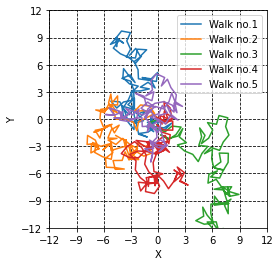

In [51]:
import matplotlib.pyplot as plt
N=100
n=12
dn=3

for i in range(5):
    r=drunkarr(N)
    plt.plot(r[0],r[1], label='Walk no.' + str(i+1))
    
# square plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis([-n,n,-n,n])
plt.xticks(range(-n,n+dn,dn))
plt.yticks(range(-n,n+dn,dn))

plt.grid(color='k', linestyle='--')
plt.axes().set_aspect('equal')

plt.show()

(b) Calculate <DR_N^2> = <x^2_N> + <y^2_N> - < x_N >^2 - < y_N >^2 for N=8, 16, 32, 64
(use a "reasonable" number of runs). Make a log-log plot of  <DR_N^2> vs. N^{2v} and estimate v.

In [52]:
def DR(a):
    N=len(a)
    return abs(sum(a[0]**2+a[1]**2)/N-(sum(a[0])/N)**2-(sum(a[1])/N)**2)

In [53]:
N=100
W=64
a=np.empty((2,W))

for j in range(W):
    a[:,j]=drunk(N)
    
print(DR(a))

501.93160141635985


In [74]:
NMAX=100
W=1000
lst=[]

A=np.empty((2,NMAX,W))

for j in range(W):
    A[:,:,j]=drunkarr(NMAX)
for N in range(NMAX):
    lst.append(DR(A[:,N,:]))

#WORSE ALTERNATIVE: IGNORE            
NMAX=1000
W=40
lst=[]

for N in range(NMAX):
    for j in range(W):
        a[:,j]=drunk(N)
    lst.append(DR(a))


Text(0, 0.5, 'Variance')

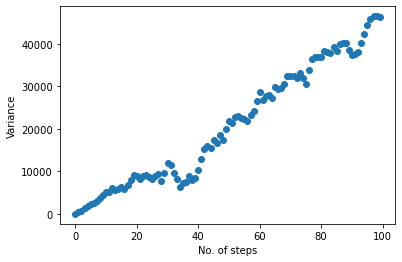

In [75]:
import matplotlib.pyplot as plt
import numpy as np
#accuracy
plt.plot(range(NMAX),lst, 'o')
plt.xlabel('No. of steps')
plt.ylabel('Variance')

In [76]:
#least squares fit
x= [np.log(j ** 2) for j in range(1,len(lst))]
y= [np.log(D) for D in lst[1:]]

m,q=lsfit(x,y)

print("Expected", 0.5, "Calculated", m)

Expected 0.5 Calculated 0.5072666426345519


(c) Consider different algorithms to randomly choose the displacements
and compute again <DR_N^2> vs N^2v to estimate v. Do you see any
change?

In [65]:
from random import randint

def drunkarr2(N):      #returns the whole path
    r=np.empty((2,N))
    l=1
    r[:,0]=[0,0]
    for i in range(1,N):
        dx=uniform(-1,1)
        sgn=(-1)**randint(0,1)
        dy=sgn*np.sqrt(1-dx**2)
        r[:,i]=r[:,i-1]+l*np.array([dx, dy])
    return r

In [ ]:
NMAX=100
W=400
lst=[]

A=np.empty((2,NMAX,W))

for j in range(W):
    A[:,:,j]=drunkarr2(NMAX)
for N in range(NMAX):
    lst.append(DR(A[:,N,:]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#accuracy
plt.plot(range(NMAX),lst, 'o')
plt.xlabel('No. of 2D walkers')
plt.ylabel('Variance')

In [ ]:
#least squares fit
x= [np.log(j ** 2) for j in range(1,len(lst))]
y= [np.log(D) for D in lst[1:]]

m,q=lsfit(x,y)

print("Expected", 0.5, "Calculated", m)

(d) Consider now the 2D RW on a square lattice (See for instance the
part of code suggested below).

(e) Repeat calculation as in (b) and discuss the results.
(f) Modify the program in order to have p!=0.4 (random walk with
a \drift") and the other probabilities equal. Calculate again the N
dependence of hR2N
i, using N=8, 16, 32, 64. Discuss the results.
(g) Simulate a rain drop falling down from a given height h in presence of
wind going nowhere (e.g. put: p! = p  = 0:15, p" = 0:1, p# = 0:6).
Let T be the average time necessary to reach the ground (use proper
units of time and lenght). What about T = T(h)? If X is the
displacement measured on the ground from a perfectly vertical fall
down, which is the h and T dependence of hX2i? Is it possible to
dene a vertical average velocity?
3

## 3. Brownian motion
It has been proved that the brownian motion of large heavy particles suspended e.g. in water (made of lighter smaller particles) can be dealt with statistical methods, without worrying about the details of the dynamics of the small molecules of the solvent. The final result for the velocity Vq and
the position Xq of the heavy particle of mass M at the time q + 1, after
many collisions in random directions with the smaller lighter particles, is:
V_(q+1) = V_q (1 - g dt/M) + wq sqrt(2 g kT dt)/M
Xq+1 = Xq + V(q+1) dt
where w is a random variable with standard Gaussian distribution and
g, the drag coefficient, can be expressed as: g= 6 pi h R using Stokes
formula for a sphere of radius R describing the heavy particle in a solvent
of viscosity h. dt is the time interval for the discretization of the motion
equation.
For a speck of pollen in water at room temperature, the physical parameters are: kT=4x10^(-21)J, M=1.4x10^(-10)kg, and (from reasonable values of h=10^(-3) and R), g= 8x10^(-7) Ns/m


In [78]:
import numpy as np

def brown(N,g,M,kT,dt):
    x=np.empty((3,N))
    v=np.empty((3,N))
    
    A=g/M*dt
    B=np.sqrt(2*g*kT*dt)/M
    
    x[:,0]=[0,0,0]
    v[:,0]=[0,0,0]
    
    for i in range(1,N):
        w = np.random.normal(0,1,size=3)
        v[:,i]= (1-A)*v[:,i-1] + B*w
        x[:,i]= x[:,i-1]+v[:,i]*dt
    return x

## TRAIETTORIE

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

M = 1.4 * 10**(-10)
kT= 4 * 10**(-21)
g = 8 * 10**(-7) 

dt =0.00001
N  =100000

ax = plt.axes(projection='3d')
ax.clear
for i in range(5):
    r=brown(N,g,M,kT,dt)
    ax.plot3D(r[0],r[1],r[2], label='Particle no.' + str(i+1))
    
ax.set_title('Brownian motion')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()

## VIDEOCLIP

Di seguito una breve animazione 3D del moto browniano di una particella

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [ ]:
M = 1.4 * 10**(-10)
kT= 4 * 10**(-21)
g = 8 * 10**(-7) 
dt= 0.0001
N = 100000
dN= 100         #quante immagini saltare

t = np.linspace(0, 200, N)
x=brown(N,g,M,kT,dt)

numDataPoints=int(N/dN)
dataSet = np.empty((3,numDataPoints))

for i in range(0,N,dN):
    dataSet[:,int(i/dN)] = x[:,i]

#print(dataSet)

In [ ]:
def animate_func(num):
    ax.clear()                         # Clears the figure to update the line, point, title, and axes  
    
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], dataSet[2, :num+1], c='red')        
    # Updating Point Location 
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num],  c='blue', marker='o')    
    # Adding Constant Origin
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],  c='black', marker='o')    
    
    lim=2*10**(-7)
    # Setting Axes Limits
    ax.set_xlim3d([-lim, lim])
    ax.set_ylim3d([-lim, lim])
    ax.set_zlim3d([-lim, lim])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [ ]:
%matplotlib notebook

# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,frames=numDataPoints)
plt.show()

(a) Verify that the mean square displacement Dx^2_i averaged over
many heavy particles is linear in time after an initial transient.

In [84]:
import numpy as np

M = 1.4 * 10**(-10)
kT= 4 * 10**(-21)
g = 8 * 10**(-7) 
dt= 0.00001
N = 100
W = 1000
d = 3

x=np.empty((d,N,W))
for i in range(W):
    x[:,:,i]=brown(N,g,M,kT,dt)

Dx2=np.empty(N)
Dx2=np.sum(x**2,axis=(0,2))

Text(0, 0.5, 'Mean Square Displacement')

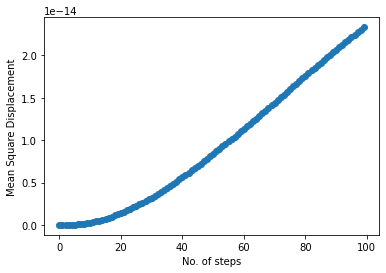

In [85]:
import matplotlib.pyplot as plt
import numpy as np
#mean square displacement
plt.plot(range(N),Dx2, 'o')
plt.xlabel('No. of steps')
plt.ylabel('Mean Square Displacement')

(b) Estimate numerically the diffusion coefficient D from the slope of this
linear behaviour, since Dx^2_i = 2dD * i (d is the dimensionality of
the system, d = 3 in our case).

In [86]:
#least squares fit

m,q=lsfit(range(N),Dx2)

print("m=", m, "\t q=", q)

m= 2.5546252817977264e-16 	 q= -3.3151776840237594e-15


(c) Verify the robustness of the result on the choice of t.

(d) Einstein provided a key relation between the diffusion coefficient D
and solvent viscosity:
D = kT/g;
where T is the temperature, k is the Boltzmann constant.
Verify the validity of the Einstein relation from your numerical estimate of D and the
input parameter of your simulation (h, T, R).

In [87]:
Dth  = kT/g
Dcal = m /6

print("expected = ", Dth, "\t calculated = ", Dcal)

expected =  5e-15 	 calculated =  4.2577088029962106e-17


(e) Repeat for reasonable dierent values of M, T and 